<a href="https://colab.research.google.com/github/mralamdari/YoloV3/blob/main/Yolo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO V1
#### yolov1 pretrained weights from [DarkNet](https://pjreddie.com/darknet/yolov1/)


#Step 0: Essentials

In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#Sample Videos
# source: https://mixkit.co/
!wget https://assets.mixkit.co/videos/download/mixkit-talented-freestyle-soccer-player-juggling-the-ball-43519.mp4
!wget https://assets.mixkit.co/videos/download/mixkit-busy-street-in-the-city-4000.mp4
!wget https://assets.mixkit.co/videos/download/mixkit-crowds-of-people-cross-a-street-junction-4401.mp4
!wget https://assets.mixkit.co/videos/download/mixkit-talented-freestyle-soccer-player-juggling-the-ball-43519.mp4

In [ ]:
#Sample Images
# source: https://pixabay.com/
!wget https://cdn.pixabay.com/photo/2016/11/23/15/32/pedestrians-1853552_960_720.jpg
!wget https://cdn.pixabay.com/photo/2017/01/28/02/24/japan-2014616_960_720.jpg
!wget https://cdn.pixabay.com/photo/2017/01/28/02/24/japan-2014617_960_720.jpg

#Step 1: Darknet
To use yolo v1 model, you can get it easily from darknet or you can create a yolo v1 model from scratch

In [ ]:
#clone Darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Total 15490 (delta 0), reused 0 (delta 0), pack-reused 15490
Receiving objects: 100% (15490/15490), 14.08 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (10408/10408), done.


In [ ]:
# change makefile to have gpu and opencv enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
#Build(make) Darknet
!make

#Step 2: Dataset

## Yolo with COCO Dataset
This Yolo model has been trained on COCO Dataset (as default) and has more than 80 classes.

In [ ]:
# Download Pre-trained Weights
%cd /content/darknet/
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

###Image Prediction

In [ ]:
# !./darknet coco test cfg/yolov1/yolo-coco.cfg yolo-coco.weights data/giraffe.jpg
!./darknet yolo test /content/darknet/cfg/yolov1/yolo.cfg /content/darknet/yolov1.weights /content/japan-2014616_960_720.jpg -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   8 max            

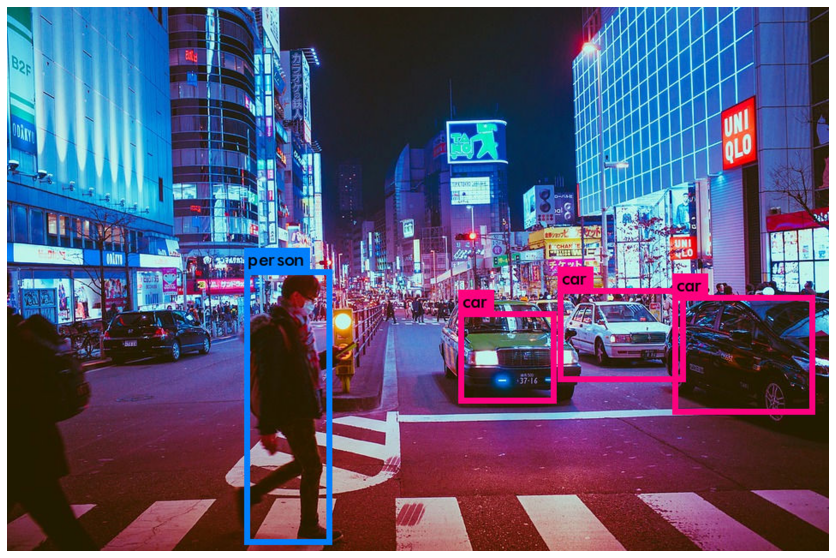

In [ ]:
imShow('predictions.jpg')

###Video Prediction

In [ ]:
output_video = '/content/results.avi'
!./darknet yolo demo /content/darknet/cfg/yolov1/yolo.cfg /content/darknet/yolov1.weights /content/mixkit-talented-freestyle-soccer-player-juggling-the-ball-43519.mp4 -dont_show -i 0 -out_filename $output_video

Streaming output truncated to the last 5000 lines.

FPS:26.7 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 65% 

FPS:27.0 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 66% 

FPS:26.7 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 66% 

FPS:26.7 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 66% 

FPS:27.0 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 68% 

FPS:26.9 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 68% 

FPS:28.1 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 67% 

FPS:27.8 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 66% 

FPS:27.1 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 65% 

FPS:27.8 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 65% 

FPS:27.7 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 68% 

FPS:27.4 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 66% 

FPS:27.1 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 67% 

FPS:26.9 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

person: 62% 

FPS:26.8 	 AVG_FPS:23.3

 cvWriteFrame 
Objects:

pe

## Yolo with Custom Dataset
Here you can add your dataset and detect the objects you desire.

### There are several ways to gather data for object detection:
#### 1. Get Pre-labeled data from Online Resources like [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
##### 2. Download Images and Label them yourself 
(zip the images folder with labels and upload it to your Google Drive)

to get Images from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html) and convert them to yolo's input types, use [OIDv4 ToolKit](https://github.com/mralamdari/OIDv4_ToolKit.git) that I've adjusted.

In [ ]:
#clone OIDv4_ToolKit
%cd /content/darknet
!git clone https://github.com/mralamdari/OIDv4_ToolKit.git

/content/darknet
Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 499, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 499 (delta 32), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (499/499), 34.11 MiB | 35.42 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [ ]:
#install necessary libraries
!pip3 install -r requirements.txt
!pip install awscli

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 8.4 MB/s 
     |████████████████████████████████| 9.1 MB 50.5 MB/s 
     |████████████████████████████████| 548 kB 61.3 MB/s 
     |████████████████████████████████| 79 kB 9.3 MB/s 
     |████████████████████████████████| 636 kB 74.1 MB/s 
     |████████████████████████████████| 140 kB 66.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninsta

In [ ]:
#Move to OIDv4_ToolKit folder
%cd OIDv4_ToolKit

#Mention the number of objects you want to train
NUM_CLASSES=2

#Write your desired objects (--classes) and data type (--type_csv)  and the number of images you want (--limit)
!python3 main.py downloader --classes Person Car --type_csv train --limit 200

/content/darknet/OIDv4_ToolKit

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Person.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 38064 KB/s, 0 sec

###1. convert the labels in to yolo's inputs format
###2. delete the labels folder
###3. transfer '/content/darknet/OIDv4_ToolKit/OID/Dataset/{train/test}' to '/content/darknet/data/obj/{train/test}'
###4. Create obj.names in /content/darknet/data/ directory
###5. Create {train/test}.txt in /content/darknet/data/ directory

In [ ]:
!python mralamdari_annotations_converter.py

Currently in subdirectory: train
Converting annotations for class: Car
100% 200/200 [00:09<00:00, 21.50it/s]
Converting annotations for class: Person
100% 200/200 [00:29<00:00,  6.67it/s]


### Obj.data

In [ ]:
with open('/content/darknet/data/obj.data', 'w+') as obj_data:
  odata = f"""classes={NUM_CLASSES}
  train=/content/darknet/data/train.txt
  valid=/content/darknet/data/test.txt
  names=/content/darknet/data/obj.names
  backup=/content/drive/MyDrive/yolo_backup
  """
  obj_data.write(odata)

os.makedirs('/content/drive/MyDrive/yolo_backup', exist_ok=True)
os.makedirs('/content/darknet/data/voc/', exist_ok=True)


os.rename('/content/darknet/data/train.txt', '/content/darknet/data/voc/train.txt')

### Adjust yolov1-custom to trainning


In [ ]:
with open('/content/darknet/cfg/yolov1/yolo.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[1] = 'batch=64\n' # batch=64
config_files[2] = 'subdivisions=64\n' # subdivisions=16

gird_size = 7
num=3
coords=3

config_files[239] = f'output={gird_size*gird_size*(((coords+1)*num)+NUM_CLASSES)}\n'
config_files[243] = f'classes={NUM_CLASSES}\n'
config_files[244] = f'coords={coords}\n'
config_files[246] = f'side={gird_size}\n'
config_files[247] = f'num={num}\n'

with open('/content/darknet/cfg/yolov1-custom.cfg', 'w+') as f:
    f.writelines(config_files)

#Step 3: Model

###Get pre-trained weights for yolo

In [ ]:
%cd /content/darknet
!wget https://raw.githubusercontent.com/frankzhangrui/Darknet-Yolo/master/extraction.conv.weights

/content/darknet
--2022-09-11 14:59:52--  https://raw.githubusercontent.com/frankzhangrui/Darknet-Yolo/master/extraction.conv.weights
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47657232 (45M) [application/octet-stream]
Saving to: ‘extraction.conv.weights’

extraction.conv.wei 100%[===================>]  45.45M  --.-KB/s    in 0.1s    

2022-09-11 14:59:53 (307 MB/s) - ‘extraction.conv.weights’ saved [47657232/47657232]



### Train from scratch

#####Use this code, so colab won't crash after being inactive for more than 10 mins;

    function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-toolbar-button#connect").click() 
    }
    setInterval(ClickConnect,60000)

In [ ]:
# !./darknet yolo train /content/darknet/cfg/yolov1-custom.cfg /content/darknet/extraction.conv.weights

!./darknet yolo train cfg/yolov1/yolo.train.cfg /content/darknet/extraction.conv.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolo
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 16, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   8 max     

### Train from where you ceased training with saved weights.

### Adjust yolov3-custom.cfg for testing


In [ ]:
with open('/content/darknet/cfg/yolov1/yolo.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[1] = 'batch=1\n' # batch=64
config_files[2] = 'subdivisions=1\n' # subdivisions=16

with open('/content/darknet/cfg/yolov1-custom.cfg', 'w+') as f:
    f.writelines(config_files)

##Predict 

###Image Prediction

In [ ]:
%cd /content/darknet
!./darknet yolo test /content/darknet/cfg/yolov1-custom.cfg /content/darknet/backup/yolov1-custom_400.weights /content/japan-2014616_960_720.jpg -dont_show

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   

In [ ]:
imShow('predictions.jpg')

###Video Prediction

In [ ]:
%cd /content/darknet
output_video = '/content/results.avi'

!./darknet detector demo /content/darknet/data/obj.data /content/darknet/cfg/yolov1-custom.cfg /content/drive/MyDrive/yolo_backup/yolov1-custom_final.weights /content/1490031016.mp4 -dont_show -i 0 -out_filename $output_video